# Welcome! To Code execution testing colab for Data Analysis Tasks!
### How to use
1. Make a copy of this file (*File -> Save copy in drive*).
2. Install the libraries.
3. Open the [Drive in the sheets](https://drive.google.com/drive/folders/1a7_txX6YoAqOqI7XBxg4B7VqOerrm_dn)
4. Read the instructions for mount this Drive.
5. Create your code according to the instructions.
6. When you finish, run the code, and save the colab (Ctrl + s).
7. Go to Share --> *Select **Anyone with the link** --> Editor*
8. Paste the link to the colab in the sheets for tasking in the column **Colab Link**

### Useful Docs
1. [Matplotlib usage examples](https://colab.research.google.com/notebooks/charts.ipynb#scrollTo=xNzEBRkzL3B0)
2. [PEP8-Style Guide For Python](https://peps.python.org/pep-0008/)


In [ ]:
!pip install matplotlib mpmath numpy pandas sympy bokeh

## Code Execution
When you make the copy, you can use the code block below to execute your code.

## How to Add shared folder with me on personal gdrive.


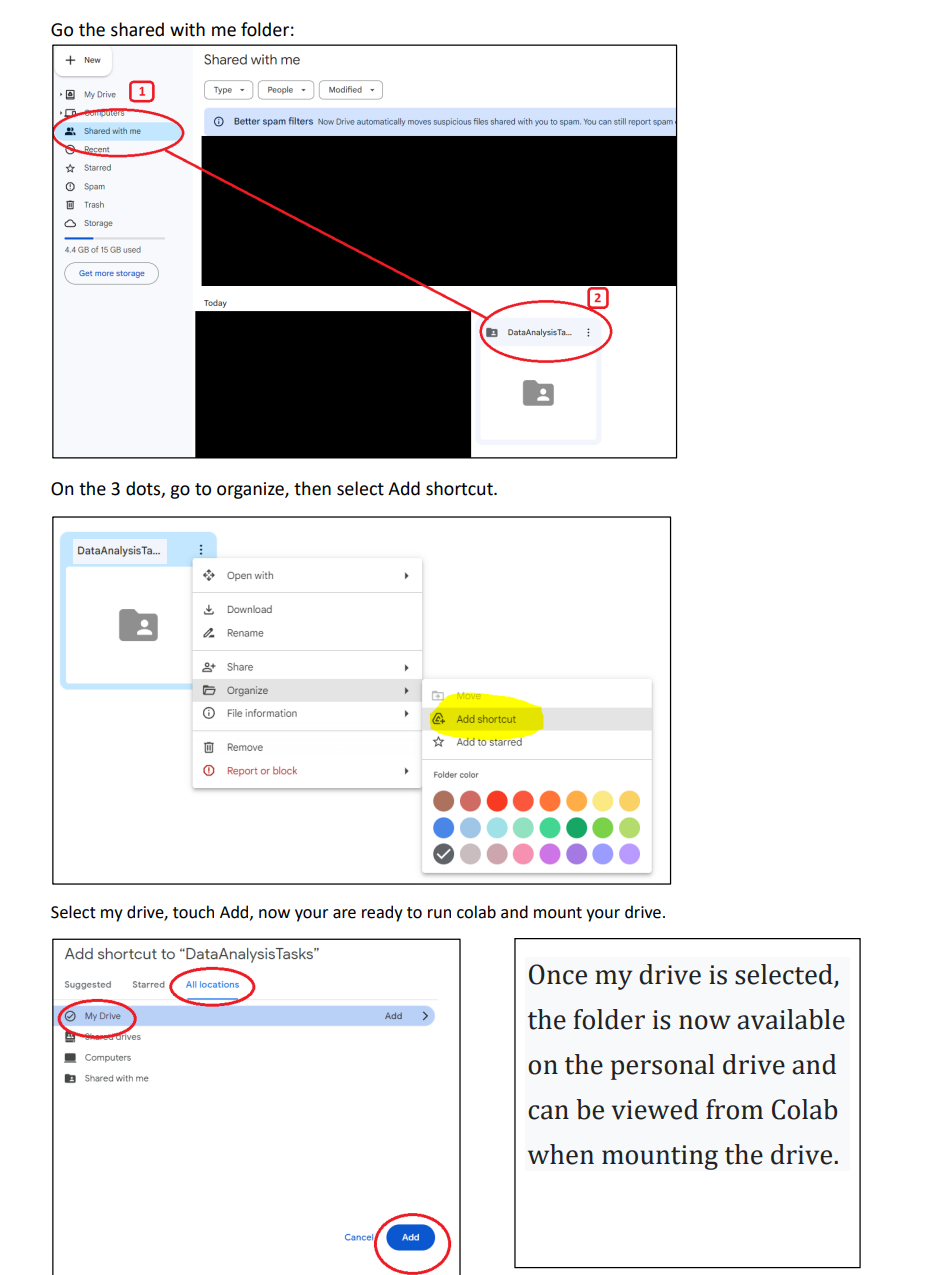

In [2]:
from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)


Mounted at /content/gdrive


EXAMPLE FOR TEST THE CORRECT MOUNT OF GDRIVE

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    # Read the workout data from the CSV file
    df = pd.read_csv("/content/gdrive/MyDrive/DataAnalysisTasks/Datasets/Automobile.csv")
    df.head()
    print("CSV file loaded successfully, you can start working right now")
except Exception as e:
    print(f"An error occurred while loading the CSV file: {e}, please check the correct mount of the shared folder")


CSV file loaded successfully, you can start working right now


## For interactive Bokeh plot this code has to be inside the cell of the Bokeh code.

In [ ]:
from bokeh.io import output_notebook
output_notebook()



---



**AFTER THIS POINT YOU CAN START WORKING**

---








*To explore the data set*

In [ ]:
import pandas as pd

df = pd.read_csv('/content/gdrive/MyDrive/DataAnalysisTasks/Datasets/bigfoot_locations.csv')

print(df.keys())
df.info()
df.isna().any()
df['classification'].unique()

Index(['index', 'number', 'title', 'classification', 'timestamp', 'latitude',
       'longitude'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           4250 non-null   int64  
 1   number          4250 non-null   int64  
 2   title           4250 non-null   object 
 3   classification  4250 non-null   object 
 4   timestamp       4250 non-null   object 
 5   latitude        4250 non-null   float64
 6   longitude       4250 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 232.5+ KB


array(['Class A', 'Class B', 'Class C'], dtype=object)

In [ ]:
df.head()

,index,number,title,classification,timestamp,latitude,longitude,date,time,cluster
184,184,6963,Report 6963: Teens have unusual experience nea...,Class A,1965-07-01 12:00:00,40.26639,-123.86920,1965-07-01,12:00:00,76
193,193,9202,Report 9202: Man remembers childhood daytime s...,Class A,1965-07-01 12:00:00,39.20500,-121.58000,1965-07-01,12:00:00,76
926,926,20002,Report 20002: Afternoon highway crossing near ...,Class A,1965-07-01 12:00:00,46.01398,-87.98718,1965-07-01,12:00:00,76
741,741,46494,Report 46494: Memory told of a daytime sightin...,Class A,1967-08-15 12:00:00,41.95860,-87.85740,1967-08-15,12:00:00,93
1812,1812,1596,Report 1596: Two men witness three large indiv...,Class A,1967-08-16 12:00:00,46.94917,-122.68690,1967-08-16,12:00:00,93


## 1. Data Manipulation

**Prompt**

Given a data set of Bigfoot sightings, I need to split the 'timestamp' column into two: 'date' and 'time'. Then I need to group the data by 2020 year and classification, and calculate the number of sightings for each combination. Plot a line graph with labels, adding months. Use Pandas and matplotlib to do this. Share the Python code with me.

**RESPONSE MODEL**

Sure, here is the line plot:

[image of the query]

And here is the code:

[CODE]

I hope this is helpful!

**Code:**

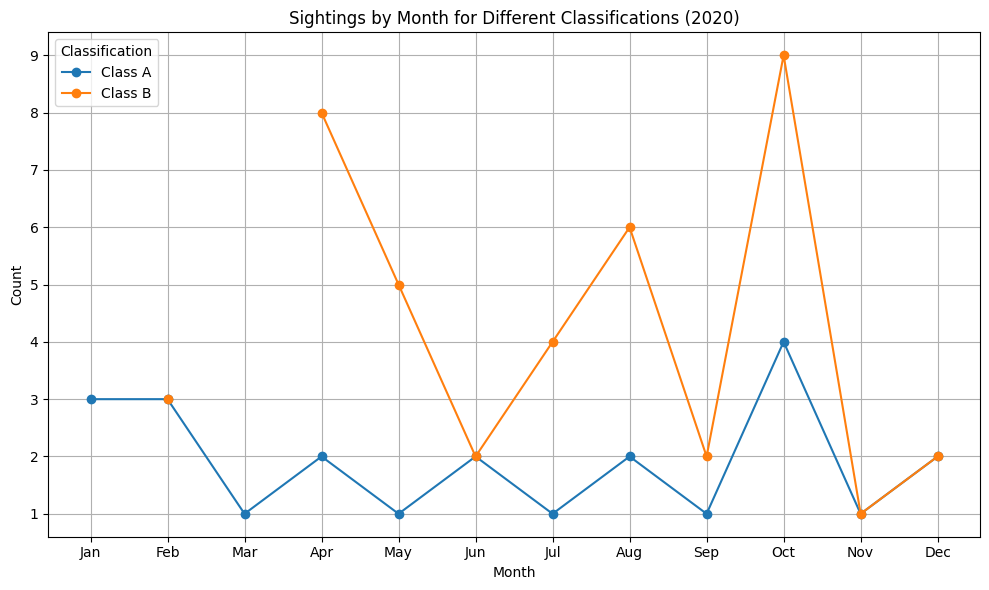

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file into a Pandas DataFrame
df = pd.read_csv('/content/gdrive/MyDrive/DataAnalysisTasks/Datasets/bigfoot_locations.csv')

# Convert the 'timestamp' column to Datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%dT%H:%M:%SZ', errors='coerce')

# Filter the DataFrame for the year 2020
df_2020 = df.loc[df['timestamp'].dt.year == 2020].iloc[:]

# Split 'timestamp' into 'date' and 'time' columns
df_2020['date'] = df_2020['timestamp'].dt.date
df_2020['time'] = df_2020['timestamp'].dt.time

# Extract month from the 'timestamp' column
df_2020['month'] = df_2020['timestamp'].dt.month

# Count of sightings per month for each classification
classification_month_counts = df_2020.groupby(['month', 'classification'])['number'].count().unstack()

# Plotting the counts of sightings per month for each classification
ax = classification_month_counts.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Sightings by Month for Different Classifications (2020)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Classification', loc='upper left')
plt.grid(True)

# Adding month labels to the x-axis
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(1, 13), months)

# Show the plot
plt.tight_layout()
plt.show()